<a href="https://colab.research.google.com/github/dukenel/Data_Analytics/blob/master/Data301_ML_Mid_Term_Test_Duke_Nelson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset background

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

# Data Acquisition

In [242]:
from sklearn.datasets import load_iris

In [243]:
#Load the dataset
iris_data = load_iris()

In [244]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [245]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [246]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# Environment Set Up

In [247]:
# Import all required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [248]:
#Create a dataframe of the given datasets
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

In [249]:
df2 =pd.DataFrame({
    'sepal length (cm)':iris_data.data[:,0],
    'sepal width (cm)':iris_data.data[:,1],
    'petal length (cm)':iris_data.data[:,2],
    'petal width (cm)':iris_data.data[:,3],
    'target':iris_data.target
})
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [250]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# EDA (Exploratory Data Analysis)

Only basic EDA (plots)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9eda25b10>,
      dtype=object)

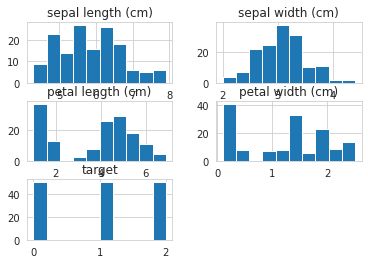

In [251]:
df2.hist()

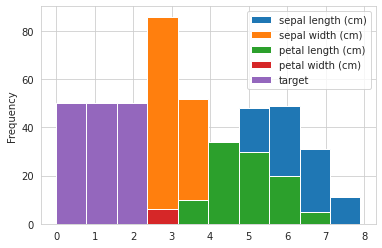

In [252]:
df2.plot(kind = "hist")

In [253]:
df2.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Sepal Length vs. Sepal Width')

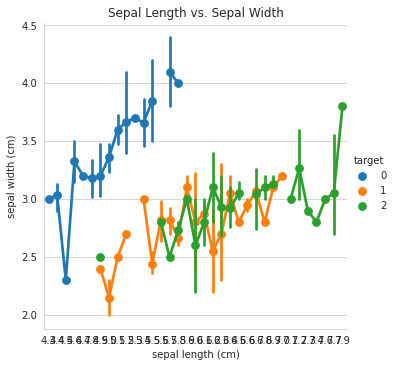

In [254]:
sns.factorplot(x="sepal length (cm)", y="sepal width (cm)", hue="target", data=df2)
plt.title("Sepal Length vs. Sepal Width")

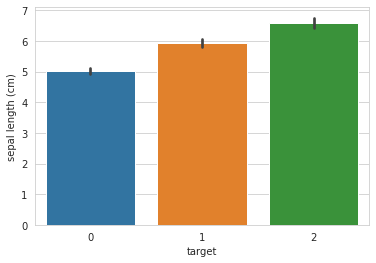

In [255]:
sns.barplot(x='target', y = 'sepal length (cm)', data = df2)

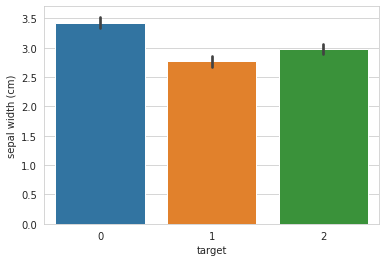

In [256]:
sns.barplot(x='target', y = 'sepal width (cm)', data = df2)

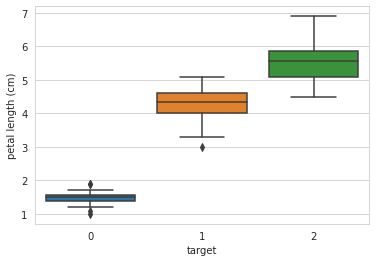

In [257]:
sns.boxplot(x='target', y = 'petal length (cm)', data = df2)

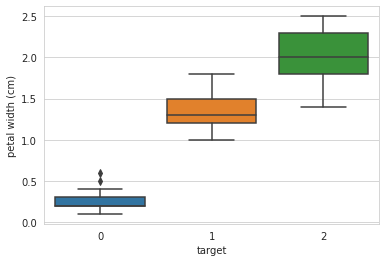

In [258]:
sns.boxplot(x='target', y = 'petal width (cm)', data = df2)

# ML - Model Building

## Algorithm # 1 - Logistic Regression

## Scenario 1: Build a model using Sepal Attributes only

*   sepal length (cm)
*   sepal width (cm) *italicized text*



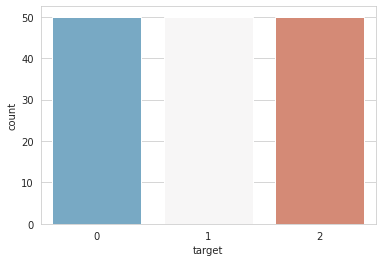

In [259]:
#Checking for balanced data
sns.set_style('whitegrid')
sns.countplot(x='target', data=df2, palette = 'RdBu_r')

## **From the above , we observe that our target variable is balanced and good for the ML prediction**

In [260]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df2[['sepal length (cm)', 'sepal width (cm)']]  # Features
y=df2['target']  # Labels

In [261]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.30) # 70% training and 30% test

In [262]:
from sklearn.linear_model import LogisticRegression


In [263]:
logReg = LogisticRegression()

In [264]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 2)
(45, 2)
(105,)
(45,)


In [265]:
logReg.fit(x_train,y_train)

LogisticRegression()

In [266]:
y_pred = logReg.predict(x_test)

In [267]:
y_pred

array([2, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 0,
       0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0,
       0])

In [268]:
logReg.score(x_test,y_test)

0.7111111111111111

In [269]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[17,  0,  0],
       [ 0,  5,  4],
       [ 0,  9, 10]])

In [270]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.36      0.56      0.43         9
           2       0.71      0.53      0.61        19

    accuracy                           0.71        45
   macro avg       0.69      0.69      0.68        45
weighted avg       0.75      0.71      0.72        45



## Scenario 2: Build a model using Petal Attributes only

*   petal length (cm)
*   petal width (cm)

In [271]:
# hint
# X= iris_data.data[:,2:]
# y=iris_data.target

In [272]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X1= iris_data.data[:,2:] # features
y1=iris_data.target # labels or target

# Split dataset into training set and test set
x1_train, x1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.30) # 70% training and 30% test

from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

In [273]:
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(105, 2)
(45, 2)
(105,)
(45,)


In [274]:
logReg.fit(x1_train,y1_train)

LogisticRegression()

In [275]:
y1_pred = logReg.predict(x1_test)

In [276]:
y1_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2,
       1, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2,
       1])

In [277]:
logReg.score(x1_test,y1_test)

0.9555555555555556

In [278]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y1_test,y1_pred)

array([[14,  0,  0],
       [ 0, 19,  1],
       [ 0,  1, 10]])

In [279]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.95      0.95      0.95        20
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



## Scenario 3: Build a model using Sepal and Petal Attributes (all attributes)

*   sepal length (cm)
*   sepal width (cm)
*   petal length (cm)
*   petal width (cm)

In [280]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X2= iris_data.data[:,0:] # features
y2=iris_data.target # labels or target

# Split dataset into training set and test set
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.30) # 70% training and 30% test

from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()


In [281]:
print(x2_train.shape)
print(x2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [282]:
logReg.fit(x2_train,y2_train)

LogisticRegression()

In [283]:
y2_pred = logReg.predict(x2_test)

In [284]:
logReg.score(x2_test,y2_test)

0.9333333333333333

In [285]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y2_test,y2_pred)

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 17]])

In [286]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      0.92      0.89        13
           2       0.94      0.89      0.92        19

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



## Algorithm # 2 - KNN (K Nearest Neibhors)

In [287]:
#We will now standardize all of our values using the StandardScaler function.
from sklearn.preprocessing import StandardScaler

In [288]:
X3=df2[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]  # Features
y3=df2['target']  # Labels

In [289]:
X3.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [290]:
scalar = StandardScaler()

In [291]:
scalar.fit(X3)

StandardScaler()

In [292]:
scaled_features = scalar.transform(X3)
std_data=pd.DataFrame(scaled_features, columns=X3.columns)
std_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [293]:
X4=std_data[['sepal length (cm)', 'sepal width (cm)']]
y4 = y3

In [294]:
X4.head()

,sepal length (cm),sepal width (cm)
0,-0.900681,1.019004
1,-1.143017,-0.131979
2,-1.385353,0.328414
3,-1.506521,0.098217
4,-1.021849,1.249201


## Scenario 1: Build a model using Sepal Attributes only

*   sepal length (cm)
*   sepal width (cm)

In [295]:
#Import train_test_split from Python's sklearn library.
from sklearn.model_selection import train_test_split
#We will split our dataset into 30 and 70.
x4_train, x4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = .30)

In [296]:
print(x4_train.shape)
print(x4_test.shape)
print(y4_train.shape)
print(y4_test.shape)

(105, 2)
(45, 2)
(105,)
(45,)


In [297]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics

In [298]:
#Declare an array called score
score=[]

In [299]:
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x4_train,y4_train)
  y1_pred = knn.predict(x4_test)
  score.append(metrics.accuracy_score(y4_test,y1_pred))

In [300]:
print(score)

[0.6888888888888889, 0.6222222222222222, 0.6888888888888889, 0.6444444444444445, 0.7111111111111111, 0.7333333333333333, 0.7555555555555555, 0.7333333333333333, 0.8, 0.7555555555555555, 0.7777777777777778, 0.8, 0.8222222222222222, 0.7777777777777778, 0.8, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.8, 0.8, 0.8, 0.7777777777777778, 0.8, 0.8, 0.7777777777777778, 0.8, 0.8222222222222222, 0.8222222222222222, 0.8444444444444444, 0.8666666666666667, 0.8666666666666667, 0.8444444444444444, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8444444444444444, 0.8444444444444444, 0.8222222222222222, 0.8, 0.8]


Text(0, 0.5, 'Accuracy Score')

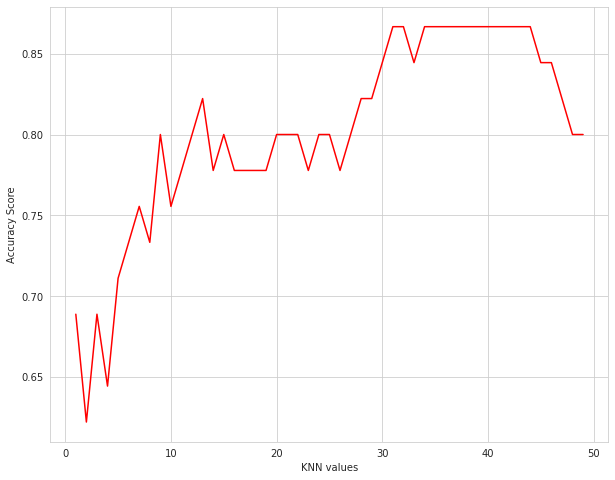

In [301]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), score, color='red')
plt.xlabel('KNN values') # Define the x-axis label
plt.ylabel('Accuracy Score') # Define the y-axis label

In [302]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x4_train,y4_train)

KNeighborsClassifier(n_neighbors=21)

In [303]:
y4_pred = knn.predict(x4_test)

In [304]:
y4_pred

array([0, 0, 2, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 2, 1, 0,
       0])

In [305]:
from sklearn.metrics import classification_report, confusion_matrix

In [306]:
cm = confusion_matrix(y4_test, y4_pred)
cm

array([[15,  0,  0],
       [ 0, 11,  5],
       [ 0,  4, 10]])

In [307]:
score = knn.score(x4_test,y4_test)
score

0.8

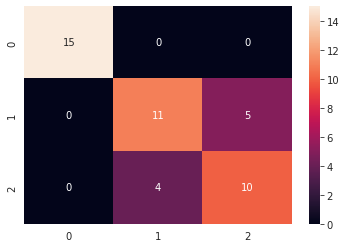

In [308]:
sns.heatmap(cm, annot=True,fmt='0.0f')

In [309]:
print(classification_report(y4_test,y4_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.73      0.69      0.71        16
           2       0.67      0.71      0.69        14

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.80      0.80      0.80        45



## Scenario 2: Build a model using Petal Attributes only

*   petal length (cm)
*   petal width (cm)

In [310]:
X5=std_data[['petal length (cm)', 'petal width (cm)']]
y5 = y3
#Import train_test_split from Python's sklearn library.
from sklearn.model_selection import train_test_split
#We will split our dataset into 30 and 70.
x5_train, x5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = .30)

In [311]:
score1=[]

In [312]:
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x5_train,y5_train)
  y2_pred = knn.predict(x5_test)
  score1.append(metrics.accuracy_score(y5_test,y2_pred))

In [313]:
print(score1)

[0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556, 0.9555555555555556]


Text(0, 0.5, 'Accuracy Score')

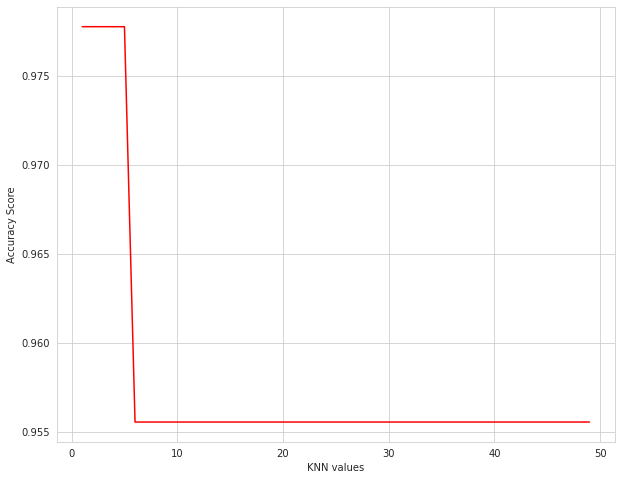

In [314]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), score1, color='red')
plt.xlabel('KNN values') # Define the x-axis label
plt.ylabel('Accuracy Score') # Define the y-axis label

In [315]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x5_train,y5_train)

KNeighborsClassifier(n_neighbors=1)

In [316]:
y5_pred = knn.predict(x5_test)

In [317]:
from sklearn.metrics import classification_report, confusion_matrix
cm1 = confusion_matrix(y5_test, y5_pred)
cm1

array([[16,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 13]])

In [318]:
score1 = knn.score(x5_test,y5_test)
score1

0.9777777777777777

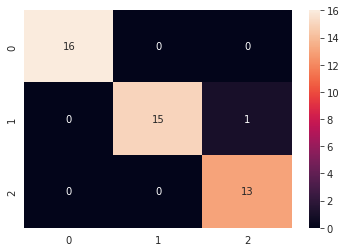

In [319]:
sns.heatmap(cm1, annot=True,fmt='0.0f')

In [320]:
print(classification_report(y5_test,y5_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Scenario 3: Build a model using Sepal and Petal Attributes (all attributes)

*   sepal length (cm)
*   sepal width (cm)
*   petal length (cm)
*   petal width (cm)

In [321]:
#Import train_test_split from Python's sklearn library.
from sklearn.model_selection import train_test_split
#We will split our dataset into 30 and 70.
x6_train, x6_test, y6_train, y6_test = train_test_split(std_data, y3, test_size = .30)

In [322]:
score3=[]

In [323]:
for i in range(1,50):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x6_train,y6_train)
  y3_pred = knn.predict(x6_test)
  score3.append(metrics.accuracy_score(y6_test,y3_pred))
print(score3)

[0.9777777777777777, 0.9555555555555556, 1.0, 0.9555555555555556, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9777777777777777, 1.0, 1.0, 1.0, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9333333333333333, 0.9555555555555556, 0.9555555555555556, 0.9333333333333333, 0.9111111111111111, 0.9111111111111111, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9111111111111111, 0.9111111111111111, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.8888888888888888, 0.9111111111111111, 0.9111111111111111, 0.9111111111111111]


Text(0, 0.5, 'Accuracy Score')

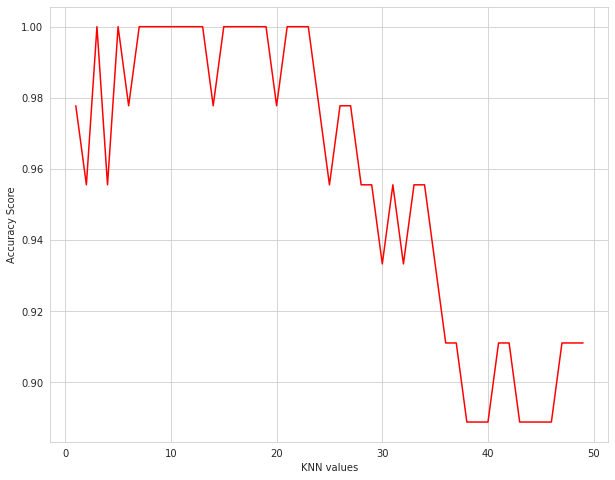

In [324]:
plt.figure(figsize=(10,8))
plt.plot(range(1,50), score3, color='red')
plt.xlabel('KNN values') # Define the x-axis label
plt.ylabel('Accuracy Score') # Define the y-axis label

In [325]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x6_train,y6_train)

KNeighborsClassifier()

In [326]:
y6_pred = knn.predict(x6_test)
from sklearn.metrics import classification_report, confusion_matrix
cm2 = confusion_matrix(y6_test, y6_pred)
cm2

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 12]])

In [327]:
score3 = knn.score(x6_test,y6_test)
score3

1.0

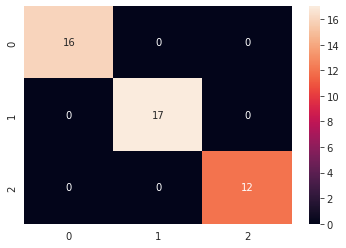

In [328]:
sns.heatmap(cm2, annot=True,fmt='0.0f')

In [329]:
print(classification_report(y6_test,y6_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Bonus Points: Decision Tree

## Build decision tree for Scenario 2


In [330]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus, graphviz
from sklearn import tree
from IPython.display import Image

In [331]:
# hint
# choose decision tree max depth=2
# X= iris_data.data[:,2:]
# y=iris_data.target
# dot_img = tree.export_graphviz(dt_clf,out_file='iris_tree.dot',feature_names=iris_data.feature_names[2:],class_names=iris_data.target_names,filled=True,rounded=True)
# tree_graph = pydotplus.graph_from_dot_file('iris_tree.dot')
# Image(tree_graph.create_png())

In [332]:
Xdt= iris_data.data[:,2:] # features
ydt=iris_data.target # labels or target


In [333]:
#We will split our dataset into 30 and 70.
xt_train, xt_test, yt_train, yt_test = train_test_split(Xdt, ydt, test_size = .30)

In [334]:
import pydotplus, graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dec_gen_model = DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=2,min_samples_leaf=4)

In [335]:
print(xt_train.shape)
print(xt_test.shape)
print(yt_train.shape)
print(yt_test.shape)

(105, 2)
(45, 2)
(105,)
(45,)


In [336]:
dec_gen_model.fit(xt_train,yt_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4)

In [337]:
dec_gen_model.score(xt_test,yt_test)*100

95.55555555555556

Print Decision Tree and write your interpretation for it

In [338]:
dot_img = tree.export_graphviz(dec_gen_model,out_file='iris_tree.dot',feature_names=iris_data.feature_names[2:],class_names=iris_data.target_names,filled=True,rounded=True)

In [339]:
tree_graph = pydotplus.graph_from_dot_file('iris_tree.dot')

In [340]:
from IPython.display import Image

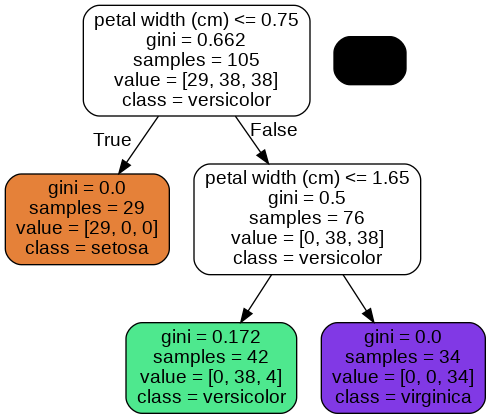

In [341]:
Image(tree_graph.create_png())

Decision Tree uses gini instead of entropy for the data split on the petal width less than 0.8. This yielded a sample of 105 our of the 150 instances. It further did a split on the verisicolor and yielded a sample of 36 which resulted in the an iris type of setosa. For the petal length less than or equal to 4.75, it got a sample of 69 and two classes to split further. The next split yielded 34 samples which resulted in an iris tope of versicolor and the remaining 35 resulted in an iris of type virginica.

# Model Comparison

Since the Dataset is balanced we will rely on the score for the model comparison.

From Logistic Regression we have a score of 97% for all features (Sepal and Petal).

From KNN we have a score of 96% for all features (Sepal and Petal)

From DecisionTree, we have a score of 93% for all features (Sepal and Petal)

For both Logistic Regression and KNN, the model performed better for the petal features compared to the sepal features.

# Model Selection

Based on the above **Model Comparison**, we can conclude that Logistic Regression Model can be selected.

# Summary and Conclusion

In conclusion, the model is good at predicting the type of iris, given the sepal length , sepal width, petal length and petal width. The accuracy score, f1 score, precision and recall values from the Logistic Regression indicates a strong performance. 
The dataset of 150 is adequately not large. 
The model performance can be improved and made robust will more data.